<h1 style="text-align: center;">AI-Powered Job Market Insights</h1>


## Introduction

The motivation behind this project stems from the growing influence of artificial intelligence (AI) on the job market. With AI becoming an integral part of workflows across industries, automation risk has become a pressing concern, not only for businesses but also for students and professionals entering the workforce. Understanding which sectors and roles are most vulnerable to automation is essential for career planning and strategic workforce management.

The primary objectives of this project are:
1. Explore how AI adoption impacts job roles and industries by identifying patterns in salary and job growth rate.
2. Identiy roles in the tech economy that are at a higher risk of being automated due to AI.
3. Understand how companies can align salary expectations with market trends and automation realities.
4. Predict salaries offered to candidates based on key job-related features, such as job title, industry, company size, and remote work availability.
5. Create a classification model to predict whether a job is at high risk of being automated in the near future.


## License 


This project follows the principles of open-source development. All datasets used are either publicly available or simulated for educational purposes. The code and models are released under the MIT License, allowing for reuse, modification, and distribution with proper attribution.

## Required Libraries

The following libraries will be used to support data manipulation, visualization, modeling, and evaluation:

In [395]:
# Insall neccesary packages 
#install.packages(c("dplyr", "tidyr", "ggplot2", 
#                   "scales", "caret", "randomForest", 
#                   "corrplot", "GGally", "rmarkdown", "knitr"))
set.seed(321)
library(dplyr)
library(glmnet)
library(nnet)
library(caret)
library(class)
library(ggplot2)
library(patchwork)
library(caTools)

## The Problem Domain and Project Framework

AI technologies are reshaping industries, disrupting traditional workflows, and introducing new challenges and opportunities. As automation becomes more prevalent, students, professionals, employers, and policymakers must adapt to these shifts to stay ahead. Students entering the workforce face the dual challenge of finding competitive roles while ensuring their career paths remain relevant in the age of automation. Employers must align salaries with market trends while planning for a future where automation plays a central role. Understanding how AI adoption influences salary trends and job stability is now essential for strategic workforce management.

This project takes a data-driven approach to address these challenges, aiming to provide actionable insights into how AI impacts salaries and job security. Specifically, the project uses information from job application pages—including job titles, industries, skills, company size, and remote work status—to develop predictive models. These models forecast:
1. Predicted Salary: Provides an estimate of the annual compensation a candidate can expect for a job listing. To predict this we will compare several regression models including: Simple linear regression, random forest regression ~~and maybe Elastic Net Regression~~. The evaluation metric will be the Root Mean Square Error (RMSE). ##*Work in Progress*

2. High Automation Risk: Assesses the estimated risk that the job will be automated within the next 10 years. To predict this we will compare several models including: Logistic regression, k-nearest neighbors (KNN) and random forest classifier. The model will be evaluated on their accuracy through 10-fold cross validation.



## Data Exploration and Transformation 


In [396]:
df <- read.csv("data1.csv")

head(df)
str(df)
summary(df)
colSums(is.na(df))
table(df$Job_Title)
table(df$Industry)


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth
2,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline
3,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26,Yes,Growth
4,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth
5,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92,Yes,Decline
6,UX Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.01,No,Growth


'data.frame':	500 obs. of  10 variables:
 $ Job_Title            : chr  "Cybersecurity Analyst" "Marketing Specialist" "AI Researcher" "Sales Manager" ...
 $ Industry             : chr  "Entertainment" "Technology" "Technology" "Retail" ...
 $ Company_Size         : chr  "Small" "Large" "Large" "Small" ...
 $ Location             : chr  "Dubai" "Singapore" "Singapore" "Berlin" ...
 $ AI_Adoption_Level    : chr  "Medium" "Medium" "Medium" "Low" ...
 $ Automation_Risk      : chr  "High" "High" "High" "High" ...
 $ Required_Skills      : chr  "UX/UI Design" "Marketing" "UX/UI Design" "Project Management" ...
 $ Salary_USD           : num  111392 93793 107170 93028 87753 ...
 $ Remote_Friendly      : chr  "Yes" "No" "Yes" "No" ...
 $ Job_Growth_Projection: chr  "Growth" "Decline" "Growth" "Growth" ...


  Job_Title           Industry         Company_Size         Location        
 Length:500         Length:500         Length:500         Length:500        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 AI_Adoption_Level  Automation_Risk    Required_Skills      Salary_USD    
 Length:500         Length:500         Length:500         Min.   : 31970  
 Class :character   Class :character   Class :character   1st Qu.: 78512  
 Mode  :character   Mode  :character   Mode  :character   Median : 91998  
                                                          Mean   : 91222  
                                                          3rd Qu.:103971  
           

Job_Title              Industry          Company_Size 
                    0                     0                     0 
             Location     AI_Adoption_Level       Automation_Risk 
                    0                     0                     0 
      Required_Skills            Salary_USD       Remote_Friendly 
                    0                     0                     0 
Job_Growth_Projection 
                    0


        AI Researcher Cybersecurity Analyst        Data Scientist 
                   51                    55                    62 
           HR Manager  Marketing Specialist    Operations Manager 
                   57                    48                    44 
      Product Manager         Sales Manager     Software Engineer 
                   39                    49                    41 
          UX Designer 
                   54 


         Education             Energy      Entertainment            Finance 
                57                 49                 47                 53 
        Healthcare      Manufacturing             Retail         Technology 
                42                 58                 46                 56 
Telecommunications     Transportation 
                53                 39 

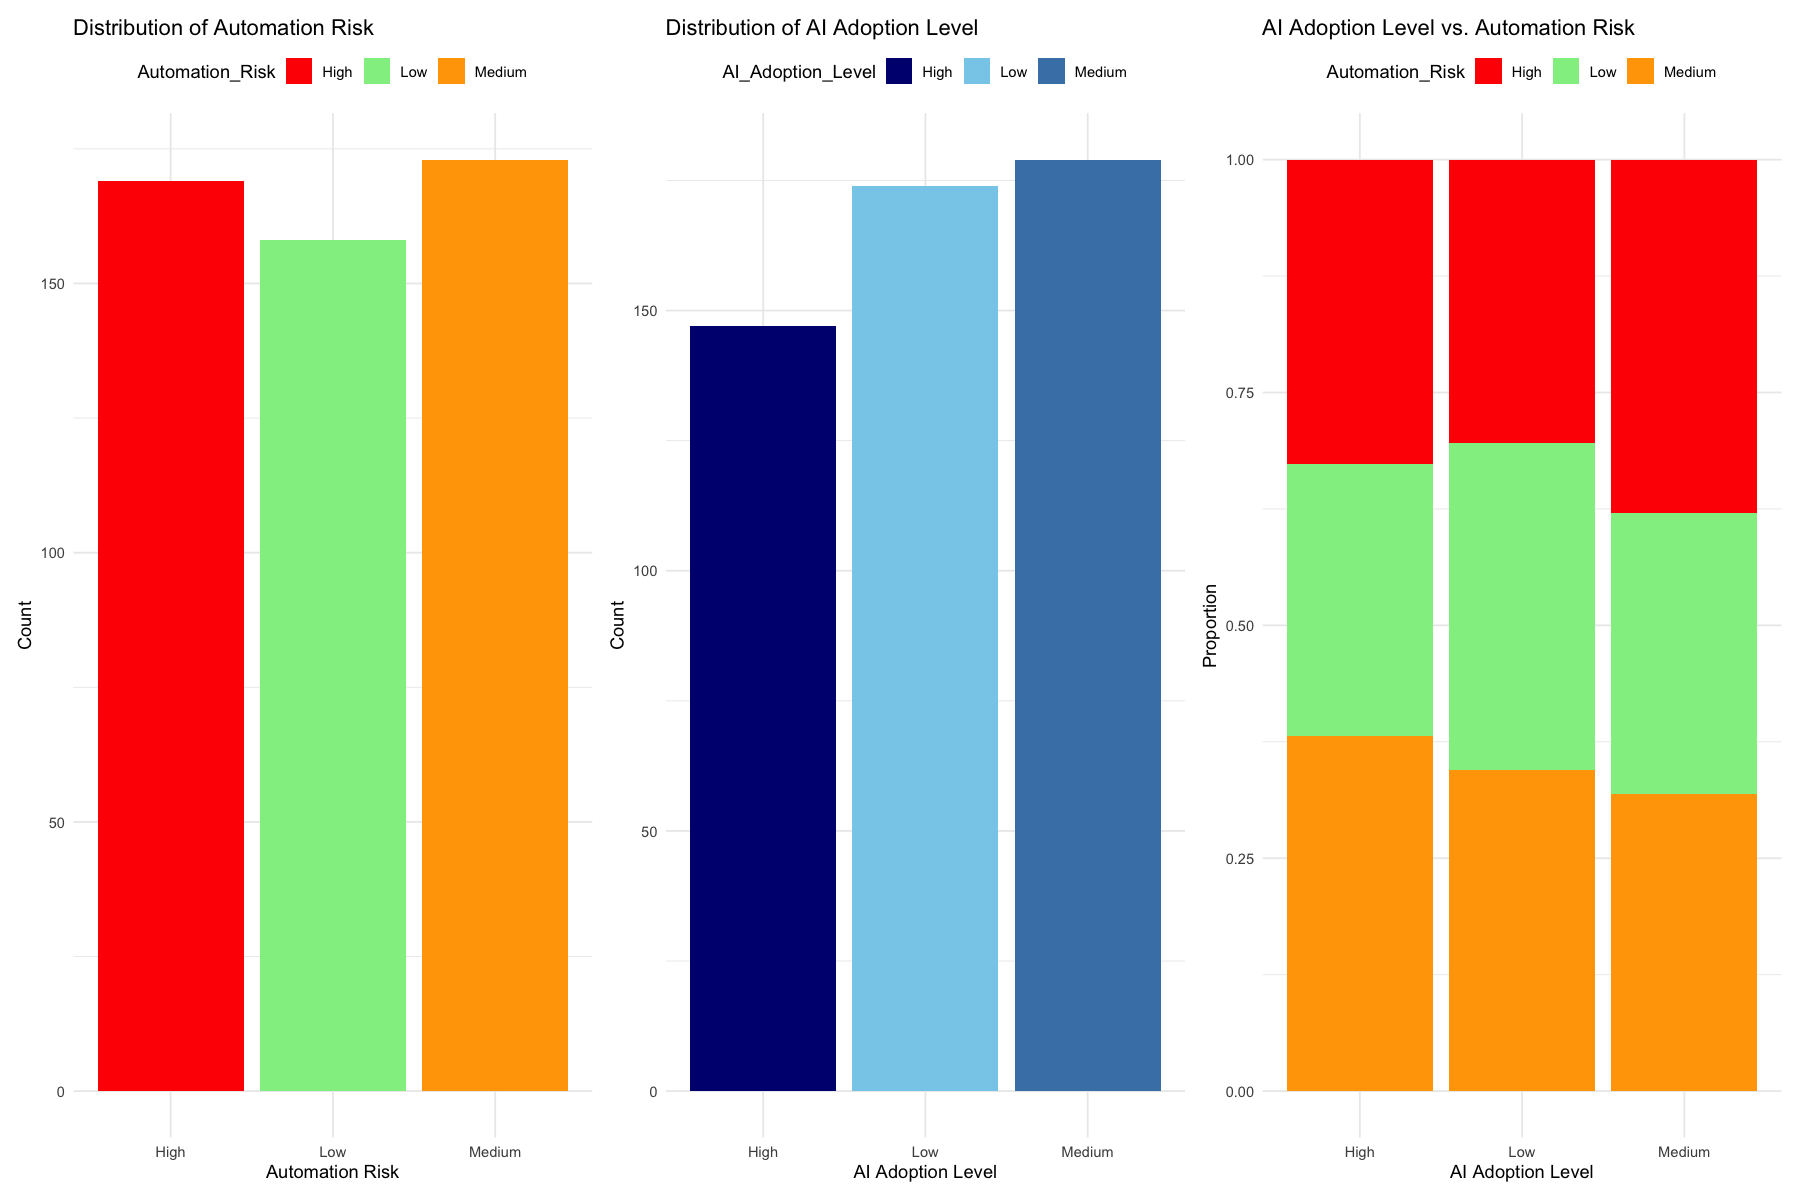

In [397]:
risk_colors <- c("Low" = "lightgreen", "Medium" = "orange", "High" = "red")

p1 <- ggplot(data, aes(x = Automation_Risk, fill = Automation_Risk)) +
  geom_bar() +
  scale_fill_manual(values = risk_colors) +
  labs(title = "Distribution of Automation Risk", x = "Automation Risk", y = "Count") +
  theme_minimal() +
  theme(legend.position = "top")

ai_colors <- c("Low" = "skyblue", "Medium" = "steelblue", "High" = "navy")

p2 <- ggplot(data, aes(x = AI_Adoption_Level, fill = AI_Adoption_Level)) +
  geom_bar() +
  scale_fill_manual(values = ai_colors) +
  labs(title = "Distribution of AI Adoption Level", x = "AI Adoption Level", y = "Count") +
  theme_minimal() +
  theme(legend.position = "top")

p3 <- ggplot(data, aes(x = AI_Adoption_Level, fill = Automation_Risk)) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = risk_colors) +
  labs(title = "AI Adoption Level vs. Automation Risk", x = "AI Adoption Level", y = "Proportion") +
  theme_minimal() +
  theme(legend.position = "top")
(p1 | p2 | p3)+ plot_layout(widths = c(1, 1, 1))


These plots offer an overview of the Automation Risk and AI Adoption Levels across job roles:

•	Balanced Distributions: Automation risk is distributed fairly evenly across low, medium, and high categories, providing a solid foundation for predictive modeling.

•	Adoption Patterns: Jobs with low AI adoption are more frequent, but there is a meaningful presence of high-adoption roles, suggesting varied readiness for automation across industries.

•	AI Adoption vs Automation Risk: As AI adoption increases, so does the proportion of jobs with high automation risk, highlighting the potential trade-off between technological integration and job stability.

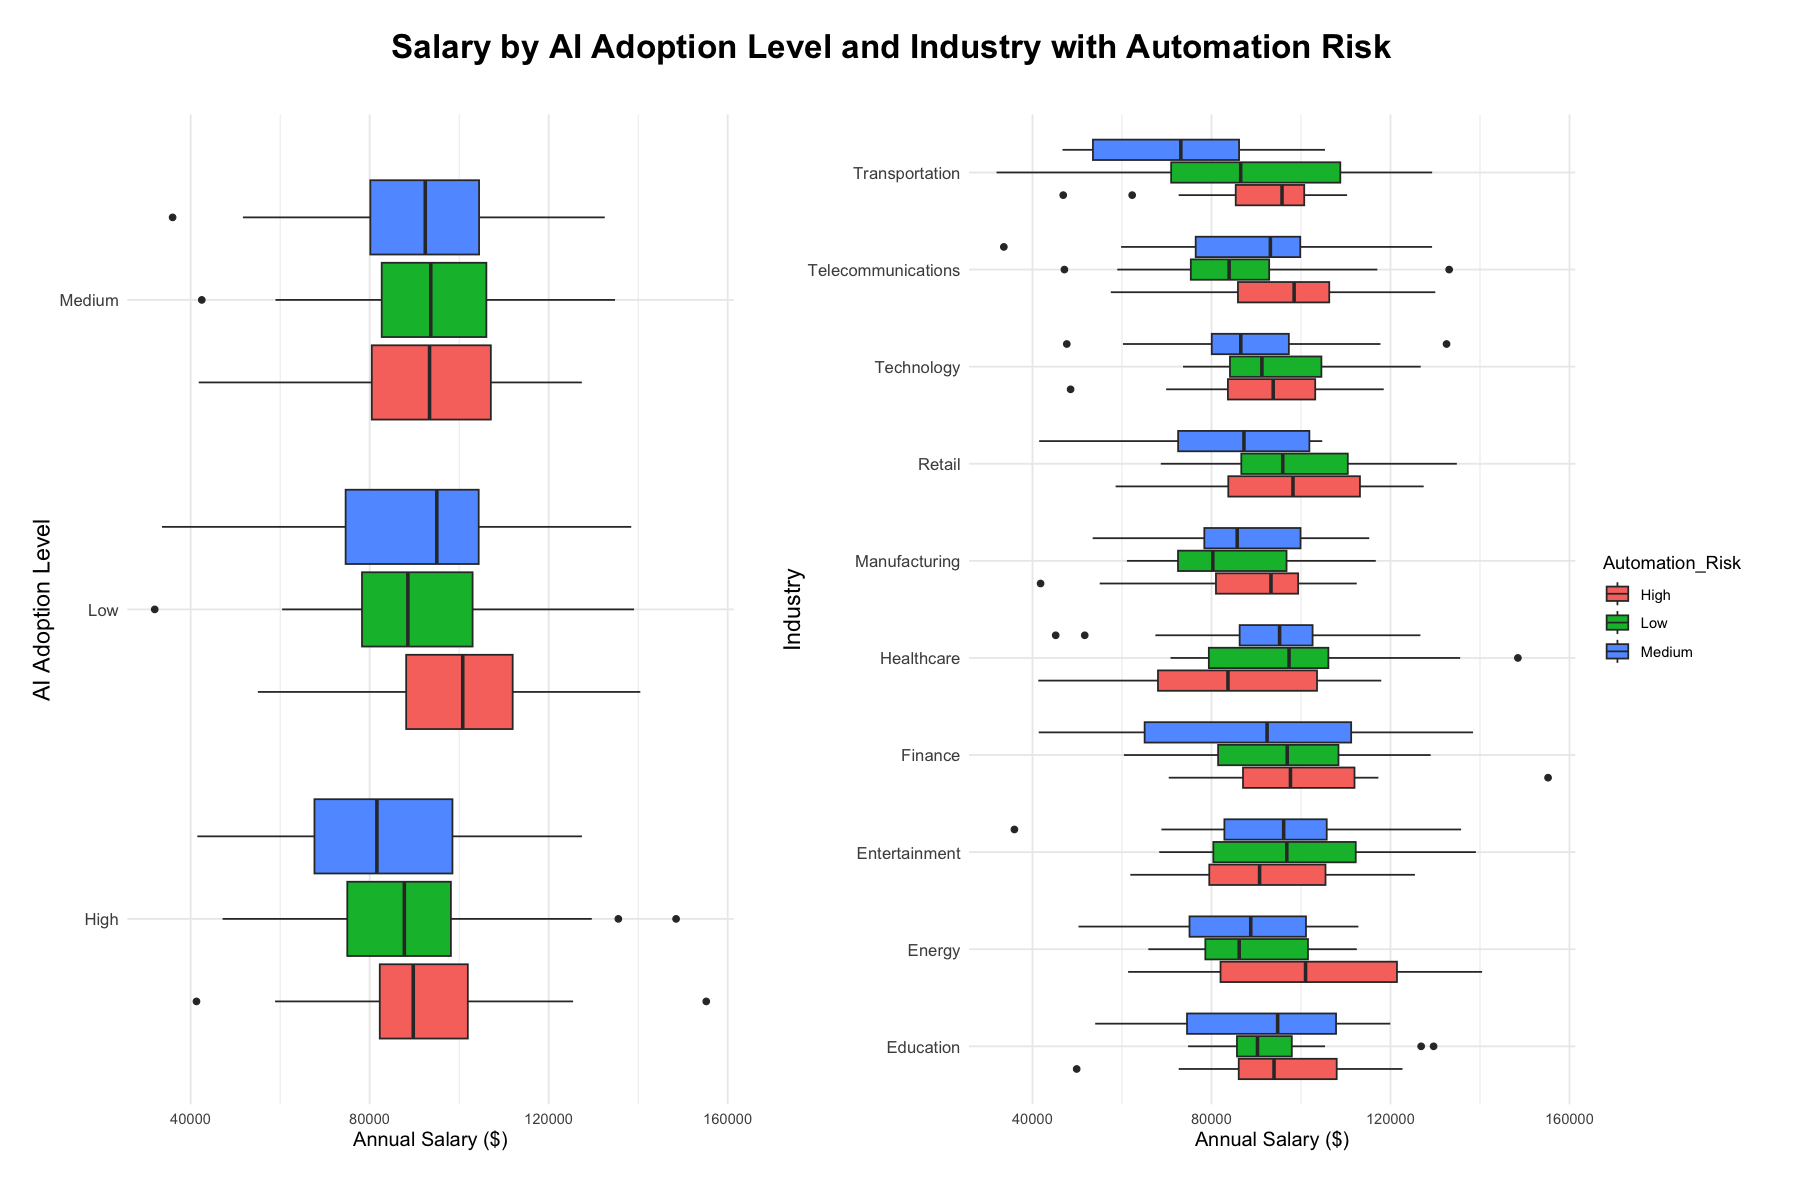

In [398]:
p3 <- ggplot(df, aes(x = Industry, y = Salary_USD, fill = Automation_Risk)) +
  geom_boxplot(width = 0.7, outlier.size = 1.5) +  # Control width of the boxes
  coord_flip() +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.margin = margin(10, 20, 10, 10),  # More space on the left for y-axis
    axis.title.y = element_text(size = 14),  # Add y-axis label size
    axis.title.x = element_text(size = 12),
    axis.text.y = element_text(size = 10)  # Ensure y-axis text is readable
  ) +
  labs(x = "Industry", y = "Annual Salary ($)")  # Add axis labels

p2 <- ggplot(df, aes(x = Salary_USD, y = AI_Adoption_Level, fill = Automation_Risk)) +
  geom_boxplot(width = 0.8, outlier.size = 1.5) +  # Control height of the boxes
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.margin = margin(10, 20, 10, 10),  # More space for better alignment
    axis.title.y = element_text(size = 14),  # Add y-axis label size
    axis.title.x = element_text(size = 12),
    axis.text.y = element_text(size = 10)  # Ensure y-axis text is readable
  ) +
  labs(x = "Annual Salary ($)", y = "AI Adoption Level")  # Add axis labels

final_plot <- (p2 | p3) +
  plot_annotation(
    title = "Salary by AI Adoption Level and Industry with Automation Risk",
    theme = theme(
      plot.title = element_text(size = 20, hjust = 0.5, face = "bold", margin = margin(b = 20)),  # Ensure title fits
      plot.margin = margin(20, 10, 20, 10)  # Extra top margin for title
    )
  )

options(repr.plot.width = 15, repr.plot.height = 10)

print(final_plot)


The first boxplot reveals that salaries tend to remain stable for roles with low automation risk, regardless of AI adoption levels. In contrast, roles with high automation risk show greater salary variability, especially in high AI adoption environments, indicating both risks and potential opportunities for skilled professionals.

The second boxplot shows that industries like Technology and Finance offer higher median salaries, even for roles with higher automation risks, suggesting these sectors are better equipped to manage automation challenges. Meanwhile, Healthcare and Education tend to offer lower salaries but are concentrated in roles with low automation risk, highlighting their reliance on human labor.

These visualizations emphasize the importance of balancing compensation with job security. For recent graduates entering the workforce, the data suggests a need to focus on industries embracing AI while targeting roles with lower automation risks to achieve both stability and career growth.

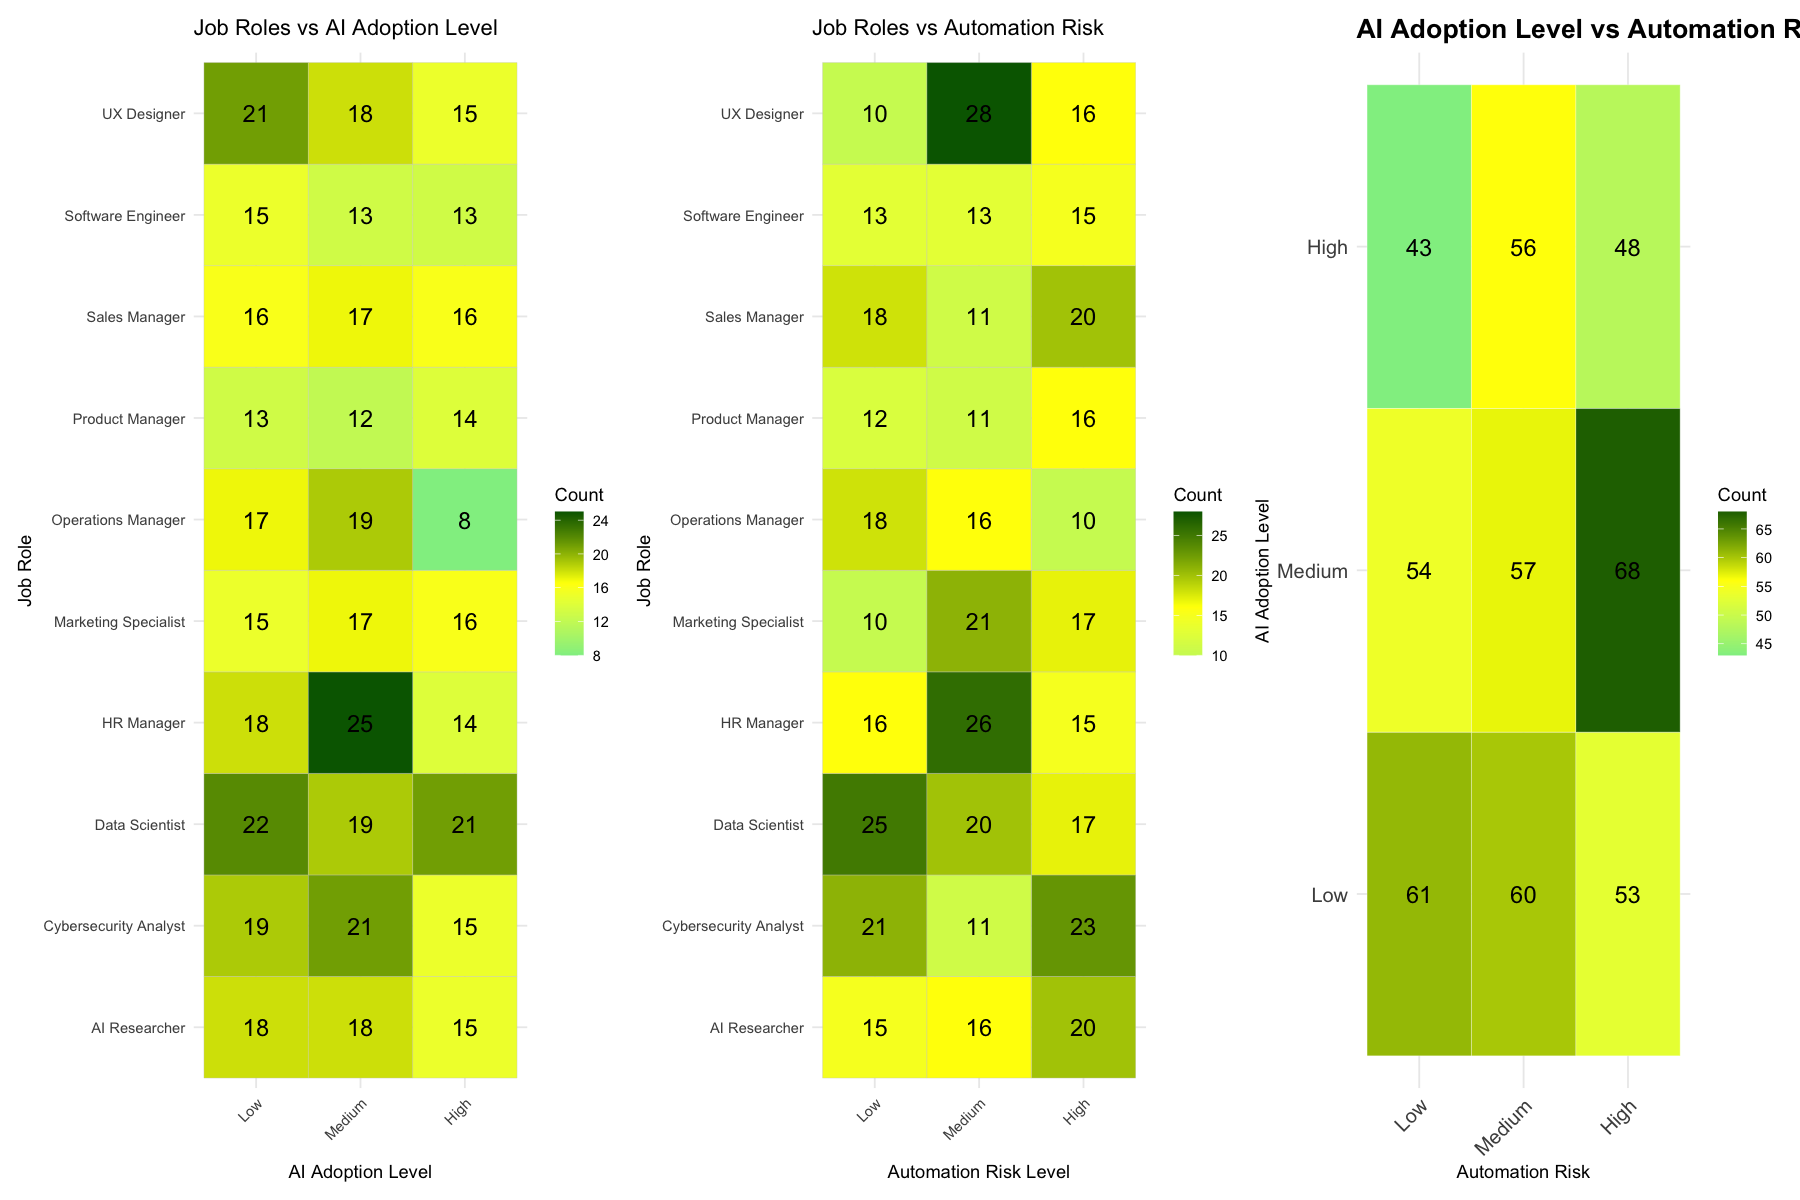

In [399]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Create Job Role vs AI Adoption Level heatmap
job_ai_adoption <- table(data$Job_Title, data$AI_Adoption_Level)
ai_adoption_df <- as.data.frame(job_ai_adoption)
ai_adoption_df$Var2 <- factor(ai_adoption_df$Var2, levels = c("Low", "Medium", "High"))

p1 <- ggplot(ai_adoption_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile(color = "gray80") +
  geom_text(aes(label = Freq), color = "black", size = 5) +
  scale_fill_gradient2(low = "lightgreen", mid = "yellow", high = "darkgreen", 
                       midpoint = median(ai_adoption_df$Freq), space = "Lab") +
  labs(title = "Job Roles vs AI Adoption Level", x = "AI Adoption Level", y = "Job Role", fill = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create Job Role vs Automation Risk heatmap
job_automation_risk <- table(data$Job_Title, data$Automation_Risk)
automation_risk_df <- as.data.frame(job_automation_risk)
automation_risk_df$Var2 <- factor(automation_risk_df$Var2, levels = c("Low", "Medium", "High"))

p2 <- ggplot(automation_risk_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile(color = "gray80") +
  geom_text(aes(label = Freq), color = "black", size = 5) +
  scale_fill_gradient2(low = "lightgreen", mid = "yellow", high = "darkgreen", 
                       midpoint = median(automation_risk_df$Freq), space = "Lab") +
  labs(title = "Job Roles vs Automation Risk", x = "Automation Risk Level", y = "Job Role", fill = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create AI Adoption Level vs Automation Risk heatmap
ai_automation_risk <- table(data$AI_Adoption_Level, data$Automation_Risk)
ai_automation_df <- as.data.frame(ai_automation_risk)
ai_automation_df$Var1 <- factor(ai_automation_df$Var1, levels = c("Low", "Medium", "High"))
ai_automation_df$Var2 <- factor(ai_automation_df$Var2, levels = c("Low", "Medium", "High"))

p3 <- ggplot(ai_automation_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), color = "black", size = 5) +
  scale_fill_gradient2(low = "lightgreen", mid = "yellow", high = "darkgreen", 
                       midpoint = median(ai_automation_df$Freq), space = "Lab") +
  labs(title = "AI Adoption Level vs Automation Risk", x = "Automation Risk", y = "AI Adoption Level", fill = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.text = element_text(size = 12), 
        plot.title = element_text(size = 16, face = "bold"))

# Display the heatmaps side by side using patchwork (optional, if needed)
library(patchwork)
final_heatmaps <- p1 | p2 | p3

# Print the final combined heatmaps
final_heatmaps

Selecting by n
Selecting by n


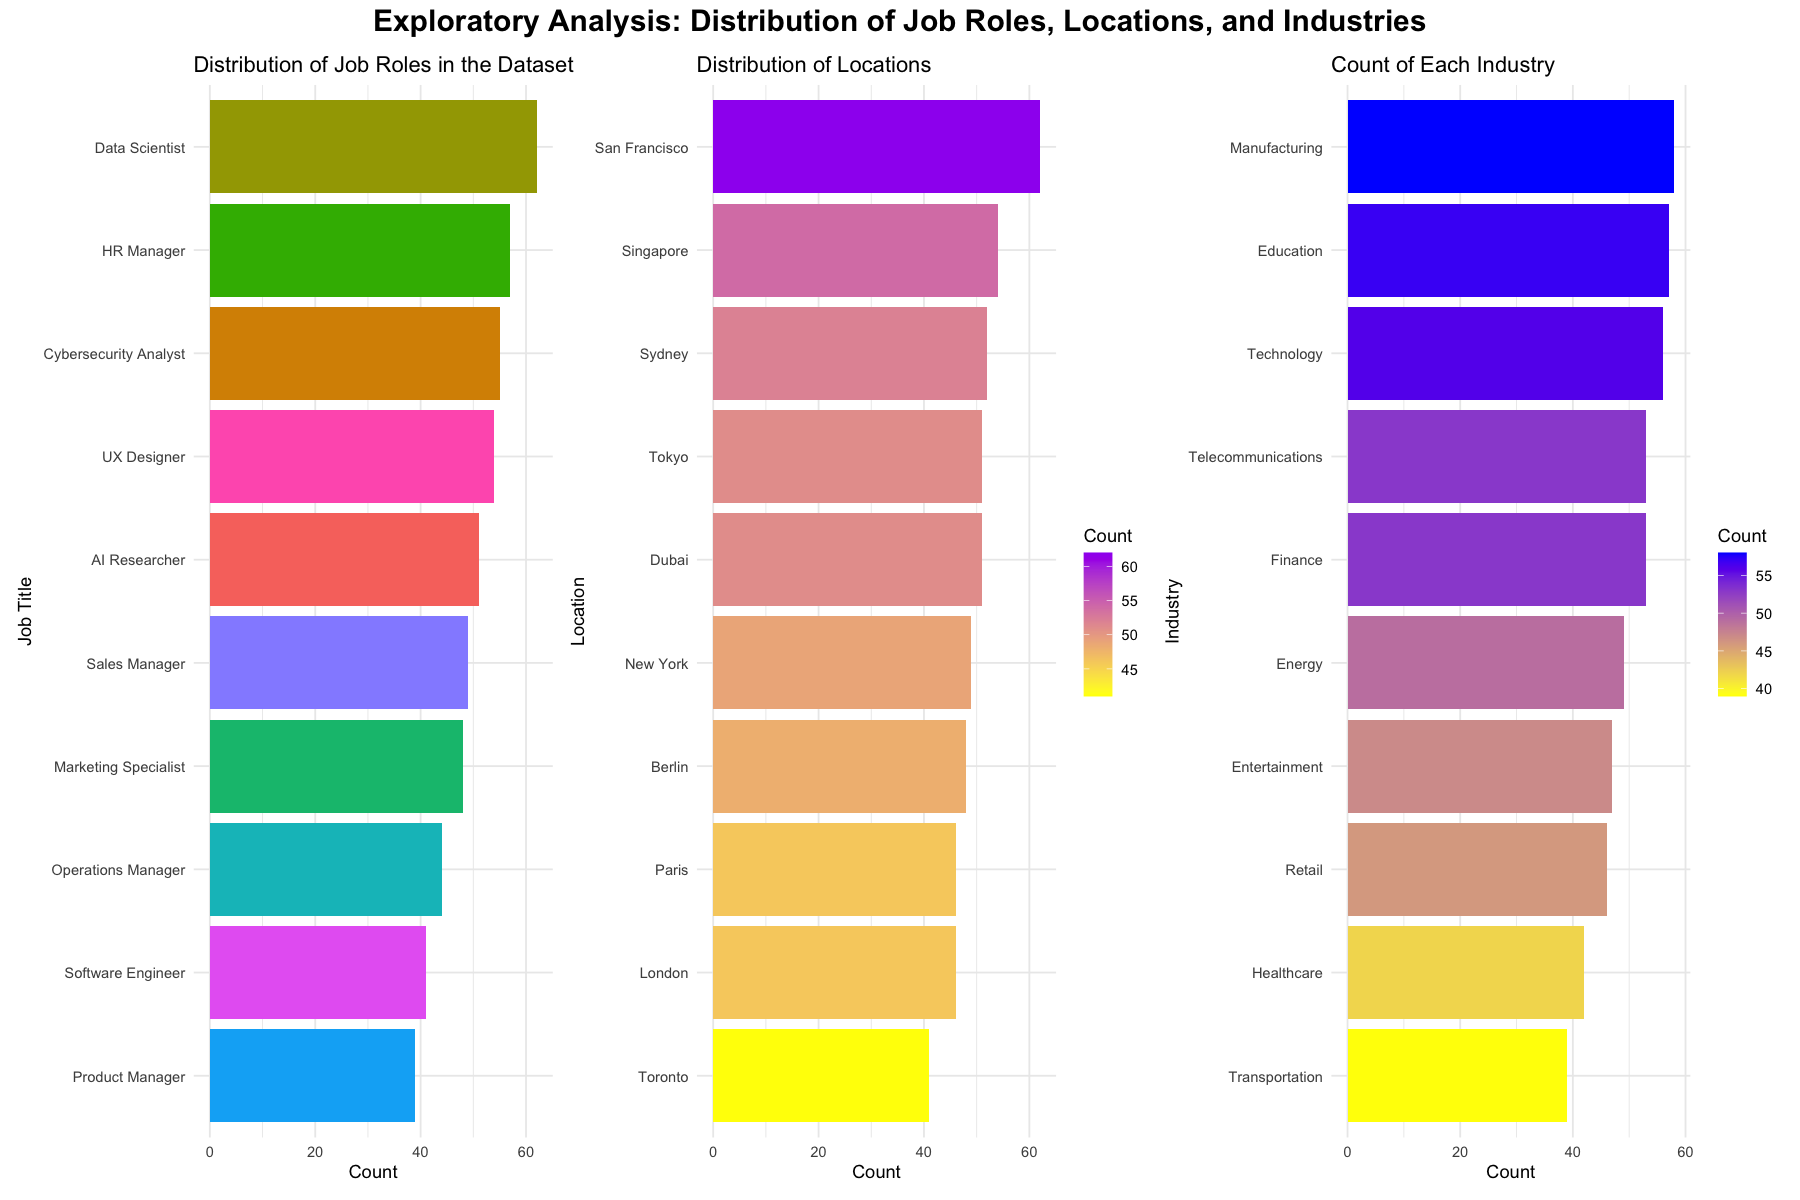

In [400]:
p1 <- df %>%
  count(Job_Title, sort = TRUE) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(Job_Title, n), y = n, fill = Job_Title)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Distribution of Job Roles in the Dataset",
       x = "Job Title", y = "Count") +
  theme_minimal() +
  theme(legend.position = "none")

p2 <- df %>%
  count(Location, sort = TRUE) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(Location, n), y = n, fill = n)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Distribution of Locations",
       x = "Location", y = "Count") +
  theme_minimal() +
  scale_fill_gradient(low = "yellow", high = "purple", name = "Count") +
  theme(legend.position = "right")

p3 <- df %>%
  count(Industry, sort = TRUE) %>%
  ggplot(aes(x = reorder(Industry, n), y = n, fill = n)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Count of Each Industry",
       x = "Industry", y = "Count") +
  theme_minimal() +
  scale_fill_gradient(low = "yellow", high = "blue", name = "Count") +
  theme(legend.position = "right")

final_plot <- (p1 | p2 | p3) +
  plot_annotation(
    title = "Exploratory Analysis: Distribution of Job Roles, Locations, and Industries",
    theme = theme(
      plot.title = element_text(size = 18, hjust = 0.5, face = "bold")
    )
  )

# Display the final plot
final_plot


The distribution plots show that while automation risk and AI adoption levels are fairly balanced, the overlap in the "medium" categories could introduce ambiguity. This overlap makes it challenging to draw clear conclusions about the relationship between automation risk and AI adoption when relying on multi-class analysis.

To address this, I added a new feature called  <span style="font-family: monospace; background-color: #f0f0f0; padding: 2px 4px; border-radius: 3px;">Automation_Risk_High</span>, which assigns a binary value to indicate whether a role has high automation risk (1 if High'', 0 if 'Med' or 'Low'). This feature will be standardized using z-score normalization in a new column <span style="font-family: monospace; background-color: #f0f0f0; padding: 2px 4px; border-radius: 3px;">Automation_Risk_High_z</span>. 

In [401]:
df <- read.csv("data1.csv")

df <- df %>%
  mutate(Automation_Risk_High = ifelse(Automation_Risk == "High", 1, 0))
df$Automation_Risk <- factor(df$Automation_Risk)
df$Company_Size <- factor(df$Company_Size)
df$Location <- factor(df$Location)
df$AI_Adoption_Level <- factor(df$AI_Adoption_Level)
df$Required_Skills <- factor(df$Required_Skills)
df$Remote_Friendly <- factor(df$Remote_Friendly)
df$Job_Growth_Projection <- factor(df$Job_Growth_Projection)
df$Automation_Risk_High <- factor(df$Automation_Risk_High, levels = c(0, 1))

trainIndex <- createDataPartition(df$Automation_Risk_High, p = 0.7, list = FALSE)
train <- df[trainIndex, ]
test <- df[-trainIndex, ]

preProcValues <- preProcess(train, method = c("center", "scale"))
trainTransformed <- predict(preProcValues, train)
testTransformed <- predict(preProcValues, test)

knnModel <- train(
  Automation_Risk_High ~ .,
  data = trainTransformed,
  method = "knn",
  trControl = trainControl(method = "cv"),
  tuneGrid = data.frame(k = c(1, 3, 5, 7, 10))
)

# Train the best model
best_model <- knn3(
  Automation_Risk_High ~ .,
  data = trainTransformed,
  k = knnModel$bestTune$k
)

predictions <- predict(best_model, testTransformed, type = "class")

cm <- confusionMatrix(predictions, testTransformed$Automation_Risk_High)
print(cm)


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 94 15
         1  5 35
                                         
               Accuracy : 0.8658         
                 95% CI : (0.8003, 0.916)
    No Information Rate : 0.6644         
    P-Value [Acc > NIR] : 1.832e-08      
                                         
                  Kappa : 0.6833         
                                         
 Mcnemar's Test P-Value : 0.04417        
                                         
            Sensitivity : 0.9495         
            Specificity : 0.7000         
         Pos Pred Value : 0.8624         
         Neg Pred Value : 0.8750         
             Prevalence : 0.6644         
         Detection Rate : 0.6309         
   Detection Prevalence : 0.7315         
      Balanced Accuracy : 0.8247         
                                         
       'Positive' Class : 0              
                                         
